In [1]:
# M U L T I P O L O - C R O S S  C O R R E L A Z I O N I

In [2]:
# Import delle Librerie Necessarie

from astropy.io import fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [3]:
# Definizioni di Variabili I

test = int(input("Inserire test: "))     # test = 1, 2, 3

Nmeasures = int(input("Inserire il numero di misure da considerare: "))

Inserire test: 1
Inserire il numero di misure da considerare: 100


In [4]:
# Definizioni di Variabili II

Nbins = 200
Nbins_tot = 3 * Nbins

In [5]:
# Definizioni dei Parametri per la Matrice di Covarianza Teorica

if test == 1:
    
    
    sigma = [0.02, 0.02, 0.02]
    
    h = [25, 50, 75]
    
elif test == 2:
    
    
    sigma = [0.02, 0.01, 0.005]
    
    h = [50, 50, 50]
    
else:
    
    
    sigma = [0.02, 0.01, 0.005]
    
    h = [5, 5, 5]

In [6]:
# Definizione della Funzione per la Matrice di Covarianza Teorica

def cov_function_th(x1, x2, sig1 ,sig2, l1, l2):
    return sig1 * sig2 * np.sqrt((2. * l1 * l2) / (l1 ** 2  + l2 ** 2)) * np.exp( - (x1 - x2) ** 2. / (l1 ** 2. + l2 ** 2.))

In [7]:
# Lettura dei Files

begin = time.time()

measures = []
pos = []

for i in np.arange(Nmeasures) + 1:
    fname = f'/home/stefano/Progetto_Ati/dati_progetto/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'

    file = fits.open(fname)
    table = file[1].data.copy()
    
    for k in range(1, 6, 2):
    
        for j in range(Nbins):
            
            measures.append([table[j][k]])
            
    if i == 1:
        
        for k in range(Nbins):
            
            pos.append(table[k][0])
            
    
    del table
    file.close()

measures = np.asarray(measures).reshape(Nmeasures, Nbins_tot).transpose()
pos = np.asarray(pos)

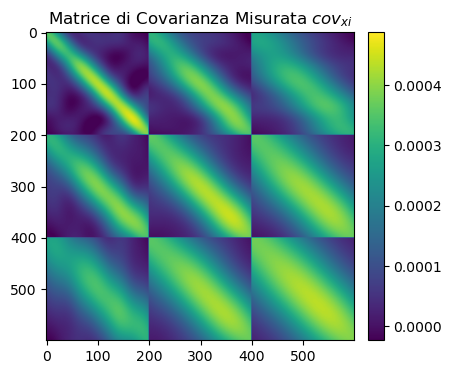

In [8]:
# Matrix plot della Matrice di Covarianza Misurata

cov_xi = np.cov(measures)

cmin = - np.max(cov_xi) * 0.05 / (test ** test)
cmax =  np.max(cov_xi) * 1.05 / (test ** test)

fig = plt.figure(figsize = (6, 4))
plt.title('Matrice di Covarianza Misurata $cov_{xi}$')
colormap = plt.cm.get_cmap('viridis')
plt.imshow(cov_xi, colormap, vmin = cmin, vmax = cmax)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

In [9]:
# Covarianza numerica 

Ave = np.zeros((Nbins_tot,), dtype = float)
Cov = np.zeros((Nbins_tot, Nbins_tot), dtype = float)

for i in range(Nmeasures):
    Ave = Ave + measures[:, i]
Ave /= Nmeasures

for i in range(Nbins_tot):
    
    for j in range(Nbins_tot):
        
        Cov[i, j] = (np.sum((measures[i] - Ave[i]) * (measures[j] - Ave[j]))) / (Nmeasures - 1.)
        
delta_cov = Cov - cov_xi

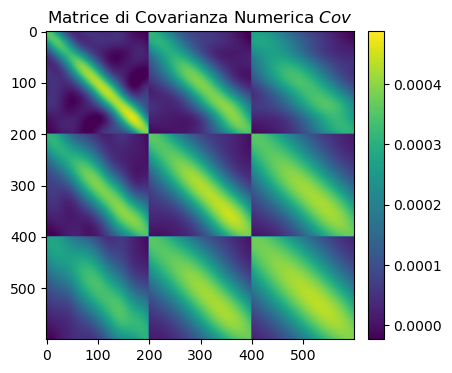

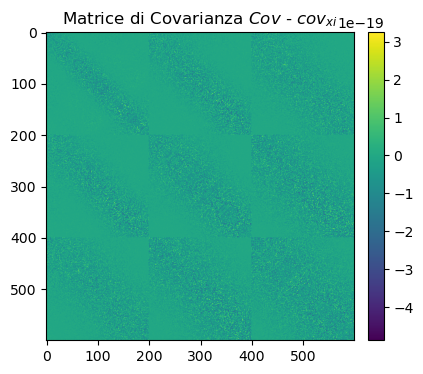

In [10]:
# Matrix plot della Matrice di Covarianza Numerica

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')    
plt.title('Matrice di Covarianza Numerica $Cov$')
plt.imshow(Cov, colormap, vmin = cmin, vmax = cmax)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

# Matrix plot della Matrice della loro Differenza

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice di Covarianza $Cov$ - $cov_{xi}$')
plt.imshow(delta_cov, colormap)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

In [11]:
# Covarianza Teorica

cov_th = np.zeros((Nbins_tot, Nbins_tot), dtype = float)


for n in range(0, 3):
    
    for m in range(0, 3):
        
        for i in range(Nbins):
            
            for j in range(Nbins):
                
                cov_th[(n * Nbins) + i, (m * Nbins) + j] = cov_function_th(pos[i], pos[j], sigma[n], sigma[m], h[n], h[m])

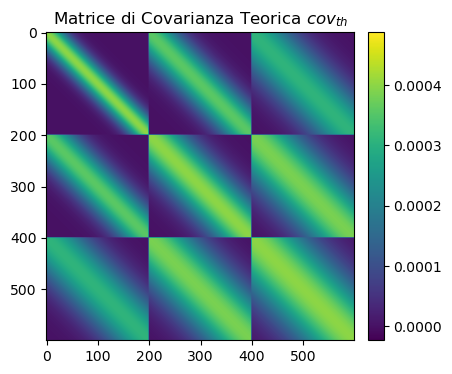

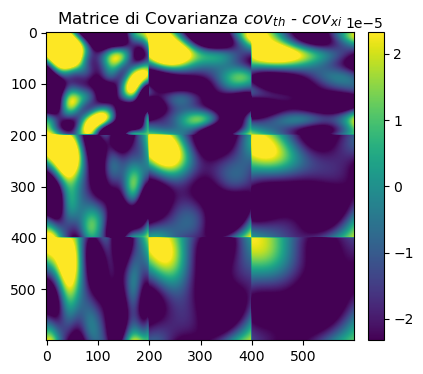

In [12]:
# Matrix plot della Matrice di Covarianza Teorica cov_th

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice di Covarianza Teorica $cov_{th}$')
plt.imshow(cov_th, colormap, vmin = cmin, vmax = cmax)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()



# Matrix plot della Matrice di Covarianza Differenza cov_th - cov_xi

Delta_cov = cov_th - cov_xi

fig = plt.figure(figsize=(6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice di Covarianza $cov_{th}$ - $cov_{xi}$')
plt.imshow(Delta_cov, vmin = cmin, vmax = - cmin)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()

In [13]:
# Calcolo dei Residui

R_th = np.zeros((Nbins_tot, Nbins_tot), dtype = float)
                
for n in range(0, 3):
    
    for m in range(0, 3):
        
        for i in range(Nbins):
            
            for j in range(Nbins):
                
                R_th[(n * Nbins) + i, (m * Nbins) + j] = (cov_th[(n * Nbins) + i, (m * Nbins) + j]) / (np.sqrt(cov_th[(n * Nbins) + i, (m * Nbins) + i] * cov_th[(n * Nbins) + j, (m * Nbins) + j])) 

                
residuals = np.zeros((Nbins_tot, Nbins_tot), dtype = float)

for n in range(0, 3):
    
    for m in range(0, 3):
        
        for i in range(Nbins):
            
            for j in range(Nbins):
        
                residuals[(n * Nbins) + i, (m * Nbins) + j] = (cov_th[(n * Nbins) + i, (m * Nbins) + j] - cov_xi[(n * Nbins) + i, (m * Nbins) + j]) * np.sqrt((Nmeasures - 1.) / ((1. + (R_th[(n * Nbins) + i, (m * Nbins) + j]) ** 2. ) * cov_th[(n * Nbins) + i, (m * Nbins) + i] * cov_th[(n * Nbins) + j, (m * Nbins) + j]))

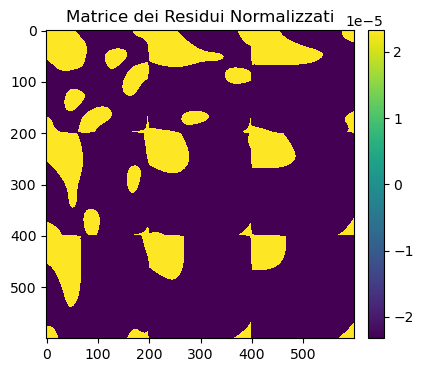

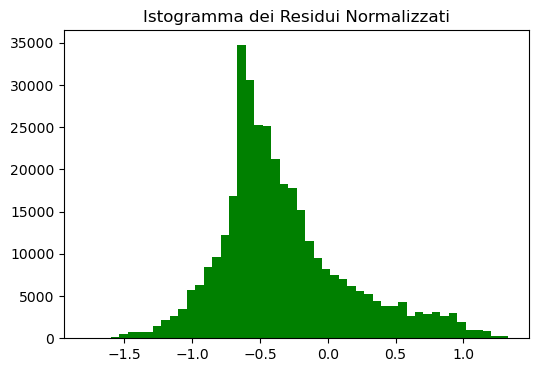

In [14]:
# Matrix plot della Matrice dei Residui Normalizzati

fig = plt.figure(figsize = (6, 4))
colormap = plt.cm.get_cmap('viridis')
plt.title('Matrice dei Residui Normalizzati')
plt.imshow(residuals, colormap,vmin = cmin, vmax = - cmin)
cbar = plt.colorbar(orientation = "vertical", pad = 0.03)
plt.show()


# Plot dell'Istogramma della Matrice dei Residui Normalizzati

res_arr = residuals.reshape(Nbins_tot ** 2)

fig = plt.figure(figsize = (6, 4))
plt.title('Istogramma dei Residui Normalizzati')
plt.hist(res_arr, 50, color = 'green')
plt.show()

In [15]:
# Verifica della Deviazione Standard e Risultati Finali

deviation = np.std(res_arr)

print('\n')

print('RISULTATI:')

print('\n')

print('La differenza massima tra Cov e cov_xi è =',np.max(np.abs(delta_cov)))

print('\n')

print('La Deviazione Standard dei Residui è = ',deviation)

print('\n')

if deviation < 1.1:
    
    print("Il codice funziona CORRETTAMENTE !")
else:
    print("QUALCOSA NON VA !")
    
end = time.time()

tempo = round(end - begin, 4)

print('\n')

print('Il tempo impiegato è =', tempo, 's')



RISULTATI:


La differenza massima tra Cov e cov_xi è = 4.87890977618477e-19


La Deviazione Standard dei Residui è =  0.4799468961404049


Il codice funziona CORRETTAMENTE !


Il tempo impiegato è = 23.5985 s
